In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
import fiona
from shapely.ops import unary_union
import networkx as nx
import itertools
import osmnx as ox
import math
import momepy
import matplotlib.pyplot as plt

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


### When all blocks are connected

In [2]:
lts=gpd.read_file('F:/Paper-5_1 Bicycle Network Connectivity Measures/pybna/Stress Shape File/Travel Time and Population Served/LTS14_HTC_Shortest_Route1.shp')
lts.head()

,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,StartTime,EndTime,StartTimeU,EndTimeUTC,Total_Minu,Total_Trav,Total_Mile,Total_Kilo,Total_Time,Total_Walk,Total_Truc,Total_Tr_1,Shape_Leng,geometry
0,1,1,G41005100008014003 - Hollywood/Northeast 42nd ...,1,1,1,None,None,None,None,0.0,0.0,0.0,3.333570,0.0,40.002357,0.0,0.0,0.030736,"LINESTRING (-122.62264 45.50477, -122.62264 45..."
1,1,1,G41005100009011000 - Hollywood/Northeast 42nd ...,1,1,2,None,None,None,None,0.0,0.0,0.0,3.335352,0.0,40.023741,0.0,0.0,0.030764,"LINESTRING (-122.62268 45.50478, -122.62264 45..."
2,1,1,G41005100011012000 - Hollywood/Northeast 42nd ...,1,1,3,None,None,None,None,0.0,0.0,0.0,3.255154,0.0,39.061175,0.0,0.0,0.037511,"LINESTRING (-122.65002 45.51934, -122.65001 45..."
3,1,1,G41005100011012001 - Hollywood/Northeast 42nd ...,1,1,4,None,None,None,None,0.0,0.0,0.0,3.299440,0.0,39.593352,0.0,0.0,0.038180,"LINESTRING (-122.65098 45.51934, -122.65065 45..."
4,1,1,G41005100011012002 - Hollywood/Northeast 42nd ...,1,1,5,None,None,None,None,0.0,0.0,0.0,3.335908,0.0,40.031077,0.0,0.0,0.038641,"LINESTRING (-122.65163 45.51934, -122.65158 45..."


In [3]:
lts[['GISJOIN','TC']]=lts['Name'].str.split('-',expand=True)
lts[['b','GISJOIN']]=lts['GISJOIN'].str.split('G',expand=True)
lts.head()

,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,StartTime,EndTime,StartTimeU,EndTimeUTC,...,Total_Kilo,Total_Time,Total_Walk,Total_Truc,Total_Tr_1,Shape_Leng,geometry,GISJOIN,TC,b
0,1,1,G41005100008014003 - Hollywood/Northeast 42nd ...,1,1,1,None,None,None,None,...,3.333570,0.0,40.002357,0.0,0.0,0.030736,"LINESTRING (-122.62264 45.50477, -122.62264 45...",41005100008014003,Hollywood/Northeast 42nd Avenue Transit Center,
1,1,1,G41005100009011000 - Hollywood/Northeast 42nd ...,1,1,2,None,None,None,None,...,3.335352,0.0,40.023741,0.0,0.0,0.030764,"LINESTRING (-122.62268 45.50478, -122.62264 45...",41005100009011000,Hollywood/Northeast 42nd Avenue Transit Center,
2,1,1,G41005100011012000 - Hollywood/Northeast 42nd ...,1,1,3,None,None,None,None,...,3.255154,0.0,39.061175,0.0,0.0,0.037511,"LINESTRING (-122.65002 45.51934, -122.65001 45...",41005100011012000,Hollywood/Northeast 42nd Avenue Transit Center,
3,1,1,G41005100011012001 - Hollywood/Northeast 42nd ...,1,1,4,None,None,None,None,...,3.299440,0.0,39.593352,0.0,0.0,0.038180,"LINESTRING (-122.65098 45.51934, -122.65065 45...",41005100011012001,Hollywood/Northeast 42nd Avenue Transit Center,
4,1,1,G41005100011012002 - Hollywood/Northeast 42nd ...,1,1,5,None,None,None,None,...,3.335908,0.0,40.031077,0.0,0.0,0.038641,"LINESTRING (-122.65163 45.51934, -122.65158 45...",41005100011012002,Hollywood/Northeast 42nd Avenue Transit Center,


In [4]:
# Read the block  and population shape file
bp=gpd.read_file("F:/Paper-5_1 Bicycle Network Connectivity Measures/pybna/Stress Shape File/Travel Time and Population Served/BlocK_level_Population and Race.shp")
bp.head()

,GISJOIN,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,...,U7B063,U7B064,U7B065,U7B066,U7B067,U7B068,U7B069,U7B070,U7B071,geometry
0,G41000500201011000,41,005,020101,1000,410050201011000,Block 1000,G5040,None,None,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-2061341.280 1178559.751, -2061346.4..."
1,G41000500201011001,41,005,020101,1001,410050201011001,Block 1001,G5040,None,None,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-2061403.070 1178577.581, -2061403.3..."
2,G41000500201011002,41,005,020101,1002,410050201011002,Block 1002,G5040,None,None,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-2061440.128 1178588.275, -2061442.7..."
3,G41000500201011003,41,005,020101,1003,410050201011003,Block 1003,G5040,None,None,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-2061531.715 1178614.589, -2061541.3..."
4,G41000500201011004,41,005,020101,1004,410050201011004,Block 1004,G5040,None,None,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-2061368.947 1178467.541, -2061374.4..."


In [5]:
bp[['b','GISJOIN']]=bp['GISJOIN'].str.split('G',expand=True)
bp.head()

,GISJOIN,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,...,U7B064,U7B065,U7B066,U7B067,U7B068,U7B069,U7B070,U7B071,geometry,b
0,41000500201011000,41,005,020101,1000,410050201011000,Block 1000,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((-2061341.280 1178559.751, -2061346.4...",
1,41000500201011001,41,005,020101,1001,410050201011001,Block 1001,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((-2061403.070 1178577.581, -2061403.3...",
2,41000500201011002,41,005,020101,1002,410050201011002,Block 1002,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((-2061440.128 1178588.275, -2061442.7...",
3,41000500201011003,41,005,020101,1003,410050201011003,Block 1003,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((-2061531.715 1178614.589, -2061541.3...",
4,41000500201011004,41,005,020101,1004,410050201011004,Block 1004,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((-2061368.947 1178467.541, -2061374.4...",


In [6]:
bp['GISJOIN']=bp['GISJOIN'].astype(str).astype('int64')
lts['GISJOIN']=lts['GISJOIN'].astype(str).astype('int64')

In [7]:
pop=pd.merge(lts,bp,left_on=['GISJOIN'],right_on=['GISJOIN'],how='inner')
pop.shape

(1960, 165)

In [8]:
median_income=pd.read_csv("F:/Paper-5_1 Bicycle Network Connectivity Measures/pybna/Stress Shape File/Travel Time and Population Served/median_hh_income.csv")
median_income.head()

,GISJOIN,YEAR,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,...,SDELMA,SDSECA,SDUNIA,PUMA5A,BTTRA,BTBGA,NAME_E,AH1PE001,NAME_M,AH1PM001
0,G41000109501001,2013-2017,NaN,NaN,Oregon,41,Baker County,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 1, Census Tract 9501, Baker County...",40156.0,"Block Group 1, Census Tract 9501, Baker County...",9365.0
1,G41000109501002,2013-2017,NaN,NaN,Oregon,41,Baker County,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 2, Census Tract 9501, Baker County...",34000.0,"Block Group 2, Census Tract 9501, Baker County...",13959.0
2,G41000109501003,2013-2017,NaN,NaN,Oregon,41,Baker County,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 3, Census Tract 9501, Baker County...",62266.0,"Block Group 3, Census Tract 9501, Baker County...",11854.0
3,G41000109502001,2013-2017,NaN,NaN,Oregon,41,Baker County,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 1, Census Tract 9502, Baker County...",78558.0,"Block Group 1, Census Tract 9502, Baker County...",26558.0
4,G41000109502002,2013-2017,NaN,NaN,Oregon,41,Baker County,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 2, Census Tract 9502, Baker County...",43625.0,"Block Group 2, Census Tract 9502, Baker County...",9086.0


## HTC LTS14 Statistics Calculation

In [9]:
lts14=gpd.read_file('F:/Paper-5_1 Bicycle Network Connectivity Measures/pybna/Stress Shape File/Travel Time and Population Served/HTC_LTS14_shortest_route.shp')
lts14.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry
0,1,1,1,G41005100008014003 - Location 1,1,2,1,3535.495946,"LINESTRING (-122.62263 45.50476, -122.62263 45..."
1,2,1,1,G41005100009011000 - Location 1,1,2,2,3536.847221,"LINESTRING (-122.62267 45.50478, -122.62263 45..."
2,3,1,1,G41005100011012000 - Location 1,2,1,3,3449.403686,"LINESTRING (-122.64957 45.51890, -122.64957 45..."
3,4,1,1,G41005100011012001 - Location 1,1,1,4,3476.948291,"LINESTRING (-122.65097 45.51933, -122.65058 45..."
4,5,1,1,G41005100011012002 - Location 1,2,1,5,3518.463904,"LINESTRING (-122.65159 45.51931, -122.65159 45..."


In [10]:
lts14['bike_travel_time']=lts14['Total_Leng']*0.000621371/24*60
lts14.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry,bike_travel_time
0,1,1,1,G41005100008014003 - Location 1,1,2,1,3535.495946,"LINESTRING (-122.62263 45.50476, -122.62263 45...",5.492137
1,2,1,1,G41005100009011000 - Location 1,1,2,2,3536.847221,"LINESTRING (-122.62267 45.50478, -122.62263 45...",5.494236
2,3,1,1,G41005100011012000 - Location 1,2,1,3,3449.403686,"LINESTRING (-122.64957 45.51890, -122.64957 45...",5.358399
3,4,1,1,G41005100011012001 - Location 1,1,1,4,3476.948291,"LINESTRING (-122.65097 45.51933, -122.65058 45...",5.401187
4,5,1,1,G41005100011012002 - Location 1,2,1,5,3518.463904,"LINESTRING (-122.65159 45.51931, -122.65159 45...",5.465679


In [11]:
lts14['bike_travel_time'].describe()

count    1949.000000
mean        3.717829
std         1.256077
min         0.095358
25%         2.837238
50%         3.934917
75%         4.809415
max         5.585792
Name: bike_travel_time, dtype: float64

In [126]:
lts14[['GISJOIN','TC']]=lts14['Name'].str.split('-',expand=True)
lts14[['b','GISJOIN']]=lts14['GISJOIN'].str.split('G',expand=True)
lts14.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry,bike_travel_time,GISJOIN,TC,b
0,1,1,1,G41005100008014003 - Location 1,1,2,1,3535.495946,"LINESTRING (2334147.366 206432.283, 2334147.36...",6.590564,41005100008014003,Location 1,
1,2,1,1,G41005100009011000 - Location 1,1,2,2,3536.847221,"LINESTRING (2334144.187 206434.155, 2334147.36...",6.593083,41005100009011000,Location 1,
2,3,1,1,G41005100011012000 - Location 1,2,1,3,3449.403686,"LINESTRING (2332084.487 208058.584, 2332086.01...",6.430078,41005100011012000,Location 1,
3,4,1,1,G41005100011012001 - Location 1,1,1,4,3476.948291,"LINESTRING (2331976.573 208109.844, 2332006.61...",6.481425,41005100011012001,Location 1,
4,5,1,1,G41005100011012002 - Location 1,2,1,5,3518.463904,"LINESTRING (2331927.525 208108.210, 2331927.61...",6.558814,41005100011012002,Location 1,


In [127]:
lts14.shape

(1949, 13)

In [130]:
lts14['GISJOIN']=lts14['GISJOIN'].astype(str).astype('int64')


In [131]:
lts14.shape,bp.shape

((1949, 13), (15498, 143))

In [162]:
pop14=pd.merge(lts14,bp,left_on=['GISJOIN'],right_on=['GISJOIN'],how='inner')
pop14.shape

(1949, 155)

In [163]:
pop14.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry_x,bike_travel_time,...,U7B064,U7B065,U7B066,U7B067,U7B068,U7B069,U7B070,U7B071,geometry_y,b_y
0,1,1,1,G41005100008014003 - Location 1,1,2,1,3535.495946,"LINESTRING (2334147.366 206432.283, 2334147.36...",6.590564,...,0,0,0,0,0,0,0,0,"POLYGON ((-2053429.375 1184579.250, -2053346.8...",
1,2,1,1,G41005100009011000 - Location 1,1,2,2,3536.847221,"LINESTRING (2334144.187 206434.155, 2334147.36...",6.593083,...,0,0,0,0,0,0,0,0,"POLYGON ((-2053610.373 1184629.937, -2053518.1...",
2,3,1,1,G41005100011012000 - Location 1,2,1,3,3449.403686,"LINESTRING (2332084.487 208058.584, 2332086.01...",6.430078,...,0,0,0,0,0,0,0,0,"POLYGON ((-2055092.801 1186739.753, -2055115.1...",
3,4,1,1,G41005100011012001 - Location 1,1,1,4,3476.948291,"LINESTRING (2331976.573 208109.844, 2332006.61...",6.481425,...,0,0,0,0,0,0,0,0,"POLYGON ((-2055168.919 1186762.023, -2055213.4...",
4,5,1,1,G41005100011012002 - Location 1,2,1,5,3518.463904,"LINESTRING (2331927.525 208108.210, 2331927.61...",6.558814,...,0,0,0,0,0,0,0,0,"POLYGON ((-2055321.046 1186806.651, -2055244.9...",


<AxesSubplot:>

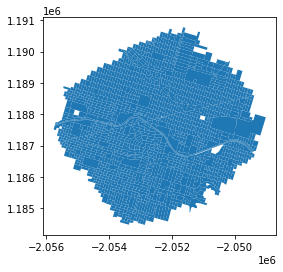

In [164]:
pop14=pop14.rename({'geometry_y':'geometry'},axis='columns')
pop14.plot()

# Calculate the served, unserved Population and income

In [198]:
pct_white14=pop14['U7B003'].sum()/pop14['U7B001'].sum()
pct_white14

0.7901549344674942

In [199]:
pct_baf14=pop14['U7B004'].sum()/pop14['U7B001'].sum()
pct_baf14

0.02802491103202847

In [167]:
# percentage of served population
pct_pop14=pop14['U7B001'].sum()/pop['U7B001'].sum()*100
print('pct_pop14:',pct_pop14)

pct_pop14: 99.53025279958533


In [139]:
bg_income=pd.merge(bg,median_income,left_on="GISJOIN",right_on='GISJOIN',how='inner')
bg_income.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,SDELMA,SDSECA,SDUNIA,PUMA5A,BTTRA,BTBGA,NAME_E,AH1PE001,NAME_M,AH1PM001
0,41,001,950100,1,410019501001,Block Group 1,G5030,S,2.205986e+09,13837275.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 1, Census Tract 9501, Baker County...",40156.0,"Block Group 1, Census Tract 9501, Baker County...",9365.0
1,41,001,950100,2,410019501002,Block Group 2,G5030,S,1.926901e+08,12317.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 2, Census Tract 9501, Baker County...",34000.0,"Block Group 2, Census Tract 9501, Baker County...",13959.0
2,41,001,950100,3,410019501003,Block Group 3,G5030,S,4.723892e+08,639439.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 3, Census Tract 9501, Baker County...",62266.0,"Block Group 3, Census Tract 9501, Baker County...",11854.0
3,41,001,950200,1,410019502001,Block Group 1,G5030,S,1.469016e+07,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 1, Census Tract 9502, Baker County...",78558.0,"Block Group 1, Census Tract 9502, Baker County...",26558.0
4,41,001,950200,2,410019502002,Block Group 2,G5030,S,1.009492e+06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 2, Census Tract 9502, Baker County...",43625.0,"Block Group 2, Census Tract 9502, Baker County...",9086.0


In [140]:
bg_income.crs

<Derived Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [141]:
##bg_income=bg_income.to_crs('epsg:4326')

In [171]:
pop14.shape

(1949, 155)

In [143]:
bg_income.shape

(2627, 55)

In [170]:
# Portland income
income14=pop14.sjoin(bg_income, how='inner')
income14.shape

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1938: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2838
Right CRS: ESRI:102003

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


(3980, 210)

<AxesSubplot:>

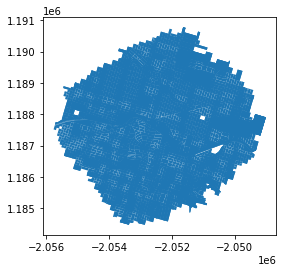

In [172]:
income14.plot()

In [173]:
income14[['AH1PE001']].describe()

,AH1PE001
count,3980.000000
mean,81957.630151
std,31982.370543
min,14444.000000
25%,55147.000000
50%,75313.000000
75%,108625.000000
max,176125.000000


# HTS_LTS13_Statistics

In [12]:
lts13=gpd.read_file('F:/Paper-5_1 Bicycle Network Connectivity Measures/pybna/Stress Shape File/Travel Time and Population Served/HTC_LTS13_shortest_route.shp')
lts13.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry
0,1,1,1,G41005100011012000 - Location 1,2,2,3,3828.132381,"LINESTRING (2332084.487 208058.584, 2332086.01..."
1,2,1,1,G41005100011012001 - Location 1,2,2,4,3882.792590,"LINESTRING (2332005.768 208081.621, 2332006.33..."
2,3,1,1,G41005100011012002 - Location 1,2,2,5,3939.042339,"LINESTRING (2331927.525 208108.210, 2331927.61..."
3,4,1,1,G41005100012021000 - Location 1,1,2,6,3444.448060,"LINESTRING (2333174.185 207269.826, 2333183.92..."
4,5,1,1,G41005100012021001 - Location 1,2,2,7,3524.723548,"LINESTRING (2333115.214 207243.907, 2333115.67..."


In [13]:
lts13['bike_travel_time']=lts13['Total_Leng']*0.000621371/20*60
lts13.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry,bike_travel_time
0,1,1,1,G41005100011012000 - Location 1,2,2,3,3828.132381,"LINESTRING (2332084.487 208058.584, 2332086.01...",7.136071
1,2,1,1,G41005100011012001 - Location 1,2,2,4,3882.792590,"LINESTRING (2332005.768 208081.621, 2332006.33...",7.237964
2,3,1,1,G41005100011012002 - Location 1,2,2,5,3939.042339,"LINESTRING (2331927.525 208108.210, 2331927.61...",7.342820
3,4,1,1,G41005100012021000 - Location 1,1,2,6,3444.448060,"LINESTRING (2333174.185 207269.826, 2333183.92...",6.420840
4,5,1,1,G41005100012021001 - Location 1,2,2,7,3524.723548,"LINESTRING (2333115.214 207243.907, 2333115.67...",6.570483


In [14]:
lts13['bike_travel_time'].describe()

count    1913.000000
mean        4.914218
std         1.750751
min         0.114430
25%         3.683657
50%         5.105276
75%         6.209523
max         9.789006
Name: bike_travel_time, dtype: float64

In [8]:
lts13[['GISJOIN','TC']]=lts13['Name'].str.split('-',expand=True)
lts13[['b','GISJOIN']]=lts13['GISJOIN'].str.split('G',expand=True)
lts13.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry,bike_travel_time,GISJOIN,TC,b
0,1,1,1,G41005100011012000 - Location 1,2,2,3,3828.132381,"LINESTRING (2332084.487 208058.584, 2332086.01...",8.920089,41005100011012000,Location 1,
1,2,1,1,G41005100011012001 - Location 1,2,2,4,3882.792590,"LINESTRING (2332005.768 208081.621, 2332006.33...",9.047455,41005100011012001,Location 1,
2,3,1,1,G41005100011012002 - Location 1,2,2,5,3939.042339,"LINESTRING (2331927.525 208108.210, 2331927.61...",9.178525,41005100011012002,Location 1,
3,4,1,1,G41005100012021000 - Location 1,1,2,6,3444.448060,"LINESTRING (2333174.185 207269.826, 2333183.92...",8.026051,41005100012021000,Location 1,
4,5,1,1,G41005100012021001 - Location 1,2,2,7,3524.723548,"LINESTRING (2333115.214 207243.907, 2333115.67...",8.213104,41005100012021001,Location 1,


In [9]:
ts13['GISJOIN']=lts13['GISJOIN'].astype(str).astype('int64')l

In [28]:
pop13=pd.merge(lts13,bp,left_on=['GISJOIN'],right_on=['GISJOIN'],how='inner')
pop13.shape

(1913, 155)

In [197]:
pct_white13=pop13['U7B003'].sum()/pop13['U7B001'].sum()
pct_baf=pop13['U7B004'].sum()/pop13['U7B001'].sum()
print('pct_baf:',pct_baf)
print('pct_white:',pct_white13)

pct_baf: 0.029034182557394435
pct_white: 0.7898225688843715


<AxesSubplot:>

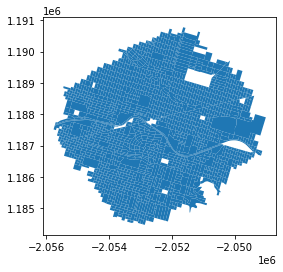

In [95]:
pop13=pop13.rename({'geometry_y':'geometry'},axis='columns')
pop13.plot()

In [96]:
# Portland income
income13=pop13.sjoin(bg_income, how='inner')
income13.shape

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1938: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2838
Right CRS: ESRI:102003

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


(3890, 210)

In [97]:
income13[['AH1PE001']].describe()

,AH1PE001
count,3890.000000
mean,82146.971979
std,32129.190363
min,14444.000000
25%,55147.000000
50%,75363.000000
75%,108625.000000
max,176125.000000


In [98]:
# percentage of served population
pct_pop13=pop13['U7B001'].sum()/pop['U7B001'].sum()*100
print('pct_pop13:',pct_pop13)

pct_pop13: 97.74413355938792


# HTS_LTS12_Statistics

In [15]:
lts12=gpd.read_file('F:/Paper-5_1 Bicycle Network Connectivity Measures/pybna/Stress Shape File/Travel Time and Population Served/HTC_LTS12_shortest_route.shp')
lts12.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry
0,1,1,1,G41005100011012000 - Location 1,2,2,3,3835.503907,"LINESTRING (2332084.487 208058.584, 2332086.01..."
1,2,1,1,G41005100011012001 - Location 1,2,2,4,3890.164117,"LINESTRING (2332005.768 208081.621, 2332006.33..."
2,3,1,1,G41005100011012002 - Location 1,2,2,5,3946.413866,"LINESTRING (2331927.525 208108.210, 2331927.61..."
3,4,1,1,G41005100012021000 - Location 1,1,2,6,3504.743573,"LINESTRING (2333174.185 207269.826, 2333183.92..."
4,5,1,1,G41005100012021001 - Location 1,2,2,7,3524.723548,"LINESTRING (2333115.214 207243.907, 2333115.67..."


In [17]:
lts12['bike_travel_time']=lts12['Total_Leng']*0.000621371/14*60
lts12.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry,bike_travel_time
0,1,1,1,G41005100011012000 - Location 1,2,2,3,3835.503907,"LINESTRING (2332084.487 208058.584, 2332086.01...",10.214018
1,2,1,1,G41005100011012001 - Location 1,2,2,4,3890.164117,"LINESTRING (2332005.768 208081.621, 2332006.33...",10.359579
2,3,1,1,G41005100011012002 - Location 1,2,2,5,3946.413866,"LINESTRING (2331927.525 208108.210, 2331927.61...",10.509373
3,4,1,1,G41005100012021000 - Location 1,1,2,6,3504.743573,"LINESTRING (2333174.185 207269.826, 2333183.92...",9.333197
4,5,1,1,G41005100012021001 - Location 1,2,2,7,3524.723548,"LINESTRING (2333115.214 207243.907, 2333115.67...",9.386404


In [18]:
lts12['bike_travel_time'].describe()

count    1886.000000
mean       12.675687
std         5.824402
min         0.163472
25%         8.263492
50%        11.693895
75%        17.154969
max        26.841031
Name: bike_travel_time, dtype: float64

In [177]:
lts12[['GISJOIN','TC']]=lts12['Name'].str.split('-',expand=True)
lts12[['b','GISJOIN']]=lts12['GISJOIN'].str.split('G',expand=True)
lts12.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry,bike_travel_time,GISJOIN,TC,b
0,1,1,1,G41005100011012000 - Location 1,2,2,3,3835.503907,"LINESTRING (2332084.487 208058.584, 2332086.01...",9.533084,41005100011012000,Location 1,
1,2,1,1,G41005100011012001 - Location 1,2,2,4,3890.164117,"LINESTRING (2332005.768 208081.621, 2332006.33...",9.668941,41005100011012001,Location 1,
2,3,1,1,G41005100011012002 - Location 1,2,2,5,3946.413866,"LINESTRING (2331927.525 208108.210, 2331927.61...",9.808749,41005100011012002,Location 1,
3,4,1,1,G41005100012021000 - Location 1,1,2,6,3504.743573,"LINESTRING (2333174.185 207269.826, 2333183.92...",8.710984,41005100012021000,Location 1,
4,5,1,1,G41005100012021001 - Location 1,2,2,7,3524.723548,"LINESTRING (2333115.214 207243.907, 2333115.67...",8.760644,41005100012021001,Location 1,


In [179]:
lts12['GISJOIN']=lts12['GISJOIN'].astype(str).astype('int64')
pop12=pd.merge(lts12,bp,left_on=['GISJOIN'],right_on=['GISJOIN'],how='inner')
pop12.shape

(1886, 155)

In [196]:
pct_white12=pop12['U7B003'].sum()/pop12['U7B001'].sum()
pct_baf12=pop12['U7B004'].sum()/pop12['U7B001'].sum()
print('pct_baf12:',pct_baf12)
print('pct_white12:',pct_white12)

pct_baf12: 0.02914461732880499
pct_white12: 0.7899849932864703


<AxesSubplot:>

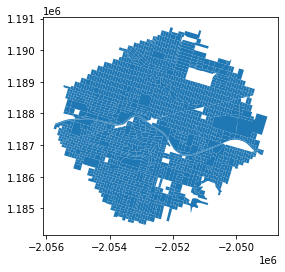

In [181]:
pop12=pop12.rename({'geometry_y':'geometry'},axis='columns')
pop12.plot()

In [182]:
# Portland income
income12=pop12.sjoin(bg_income, how='inner')
income12.shape

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1938: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2838
Right CRS: ESRI:102003

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


(3819, 210)

In [183]:
income12[['AH1PE001']].describe()

,AH1PE001
count,3819.000000
mean,82321.588112
std,32289.757464
min,14444.000000
25%,55147.000000
50%,75363.000000
75%,109167.000000
max,176125.000000


In [184]:
# percentage of served population
pct_pop12=pop12['U7B001'].sum()/pop['U7B001'].sum()*100
print('pct_pop12:',pct_pop12)

pct_pop12: 95.70640260034772


## Only LTS1

In [19]:
lts1=gpd.read_file('F:/Paper-5_1 Bicycle Network Connectivity Measures/pybna/Stress Shape File/Travel Time and Population Served/HTC_LTS1_shortest_route.shp')
lts1.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry
0,1,1,1,G41005100011012000 - Location 1,2,2,3,3879.247685,"LINESTRING (2332084.487 208058.584, 2332086.01..."
1,2,1,1,G41005100011012001 - Location 1,2,2,4,3933.907895,"LINESTRING (2332005.768 208081.621, 2332006.33..."
2,3,1,1,G41005100011012002 - Location 1,2,2,5,3990.157644,"LINESTRING (2331927.525 208108.210, 2331927.61..."
3,4,1,1,G41005100012021001 - Location 1,2,2,7,3536.935134,"LINESTRING (2333115.214 207243.907, 2333115.67..."
4,5,1,1,G41005100012031000 - Location 1,2,2,9,3275.710626,"LINESTRING (2333174.320 207517.039, 2333219.06..."


In [21]:
lts1['bike_travel_time']=lts1['Total_Leng']*0.000621371/10*60
lts1.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry,bike_travel_time
0,1,1,1,G41005100011012000 - Location 1,2,2,3,3879.247685,"LINESTRING (2332084.487 208058.584, 2332086.01...",14.462712
1,2,1,1,G41005100011012001 - Location 1,2,2,4,3933.907895,"LINESTRING (2332005.768 208081.621, 2332006.33...",14.666498
2,3,1,1,G41005100011012002 - Location 1,2,2,5,3990.157644,"LINESTRING (2331927.525 208108.210, 2331927.61...",14.876209
3,4,1,1,G41005100012021001 - Location 1,2,2,7,3536.935134,"LINESTRING (2333115.214 207243.907, 2333115.67...",13.186494
4,5,1,1,G41005100012031000 - Location 1,2,2,9,3275.710626,"LINESTRING (2333174.320 207517.039, 2333219.06...",12.212590


In [22]:
lts1['bike_travel_time'].describe()

count    680.000000
mean      10.138400
std        3.611002
min        0.228860
25%        7.620132
50%       10.697835
75%       12.678155
max       17.779062
Name: bike_travel_time, dtype: float64

In [188]:
lts1[['GISJOIN','TC']]=lts1['Name'].str.split('-',expand=True)
lts1[['b','GISJOIN']]=lts1['GISJOIN'].str.split('G',expand=True)
lts1.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry,bike_travel_time,GISJOIN,TC,b
0,1,1,1,G41005100011012000 - Location 1,2,2,3,3879.247685,"LINESTRING (2332084.487 208058.584, 2332086.01...",12.052260,41005100011012000,Location 1,
1,2,1,1,G41005100011012001 - Location 1,2,2,4,3933.907895,"LINESTRING (2332005.768 208081.621, 2332006.33...",12.222081,41005100011012001,Location 1,
2,3,1,1,G41005100011012002 - Location 1,2,2,5,3990.157644,"LINESTRING (2331927.525 208108.210, 2331927.61...",12.396841,41005100011012002,Location 1,
3,4,1,1,G41005100012021001 - Location 1,2,2,7,3536.935134,"LINESTRING (2333115.214 207243.907, 2333115.67...",10.988745,41005100012021001,Location 1,
4,5,1,1,G41005100012031000 - Location 1,2,2,9,3275.710626,"LINESTRING (2333174.320 207517.039, 2333219.06...",10.177158,41005100012031000,Location 1,


In [189]:
lts1['GISJOIN']=lts1['GISJOIN'].astype(str).astype('int64')
pop1=pd.merge(lts1,bp,left_on=['GISJOIN'],right_on=['GISJOIN'],how='inner')
pop1.shape

(680, 155)

In [191]:
pct_white1=pop1['U7B003'].sum()/pop1['U7B001'].sum()
pct_baf1=pop1['U7B004'].sum()/pop1['U7B001'].sum()
print('pct_baf1:',pct_baf1)
print('pct_white1:',pct_white1)

pct_baf1: 0.018749796197867416
pct_white1: 0.8000456516776991


<AxesSubplot:>

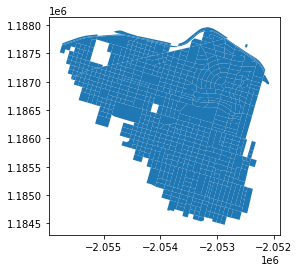

In [192]:
pop1=pop1.rename({'geometry_y':'geometry'},axis='columns')
pop1.plot()

In [193]:
# Portland income
income1=pop1.sjoin(bg_income, how='inner')
income1.shape

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1938: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2838
Right CRS: ESRI:102003

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


(1327, 210)

In [194]:
income1[['AH1PE001']].describe()

,AH1PE001
count,1327.000000
mean,73693.339864
std,29901.980350
min,14444.000000
25%,46458.000000
50%,68269.000000
75%,88664.000000
max,137841.000000


In [195]:
# percentage of served population
pct_pop1=pop1['U7B001'].sum()/pop['U7B001'].sum()*100
print('pct_pop1:',pct_pop1)

pct_pop1: 33.11663768992365
